## Comparative Analysis of Data Job Postings in Selected Countries

This notebook is part of the `data_jobs_pk` project and focuses on analyzing data-related job postings with Pakistan as the central subject. We will explore required skills, top hiring companies, and the benefits offered by companies in Pakistan and compare them with selected countries that share similarities with Pakistan.

Data jobs are becoming increasingly vital as businesses and organizations rely more on data-driven decision-making. Understanding the job market for data professionals in Pakistan, along with comparisons to other similar countries, will provide valuable insights into global trends, regional strengths, and areas for improvement.

In this analysis, we will:
- Investigate the required skills for data-related jobs in Pakistan.
- Identify the top companies hiring for these roles in Pakistan.
- Analyze the benefits offered to data professionals by companies in Pakistan.
- Compare these aspects with Turkey, Bangladesh, Nigeria, and Egypt to understand regional similarities and differences.

## Comparison Countries and Their Similarities to Pakistan

**Turkey**: Growing tech sector and young, tech-savvy population.

**Bangladesh**: Rapid economic growth and young workforce.

**Nigeria**: Large economy and youthful population.

**Egypt**: Emphasis on developing its ICT sector and government support for technology.

This comparative analysis aims to provide a comprehensive view of the data job market, with Pakistan at the center of focus, while examining relevant regional trends through these selected countries.


In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('df_comparison_countries.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        4957 non-null   object        
 1   job_title              4957 non-null   object        
 2   job_location           4957 non-null   object        
 3   job_via                4957 non-null   object        
 4   job_schedule_type      4950 non-null   object        
 5   job_work_from_home     4957 non-null   bool          
 6   search_location        4957 non-null   object        
 7   job_posted_date        4957 non-null   datetime64[ns]
 8   job_no_degree_mention  4957 non-null   bool          
 9   job_health_insurance   4957 non-null   bool          
 10  job_country            4957 non-null   object        
 11  salary_rate            50 non-null     object        
 12  salary_year_avg        43 non-null     float64       
 13  sal

In [2]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [8]:
from eda_functions import convert_job_skills
df['job_skills'] = df['job_skills'].apply(convert_job_skills)

unique_types = df['job_skills'].apply(type).unique()
unique_types

array([<class 'list'>, <class 'float'>], dtype=object)

There is a float type, First intuition is that there are NaN,NaN values in pandas are of type float by default.

In [14]:
nan_values=df['job_skills'].isna().sum()
print(nan_values)

if nan_values > 0:
    print("There are NaN values whaich are saved as float")


879
There are NaN values whaich are saved as float


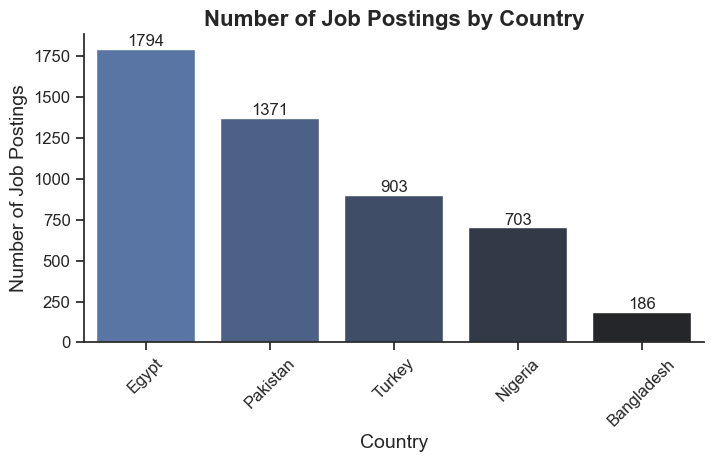

             count
job_country       
Egypt         1794
Pakistan      1371
Turkey         903
Nigeria        703
Bangladesh     186


In [25]:
# Assuming df is already defined and contains the necessary data

# Create a DataFrame with value counts for job postings by country
df_plot = df['job_country'].value_counts().to_frame()
df_plot.columns = ['count']

# Set the theme for consistency
sns.set_theme(style='ticks')

# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(figsize=(8, 4))

# Create a vertical bar plot with Seaborn, specifying the axes
sns.barplot(data=df_plot, x=df_plot.index, y='count', palette='dark:b_r', ax=ax)

# Customize the plot
ax.set_title('Number of Job Postings by Country', fontsize=16, fontweight='bold')
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Number of Job Postings', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=45)  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=12)
sns.despine(ax=ax)

# Annotate each bar with the count value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# Show the plot
plt.show()

# Optionally, save the plot to a file
fig.savefig('job_postings_by_country.png', dpi=300, bbox_inches='tight')

# Display a summary of the data for added insight
print(df_plot)


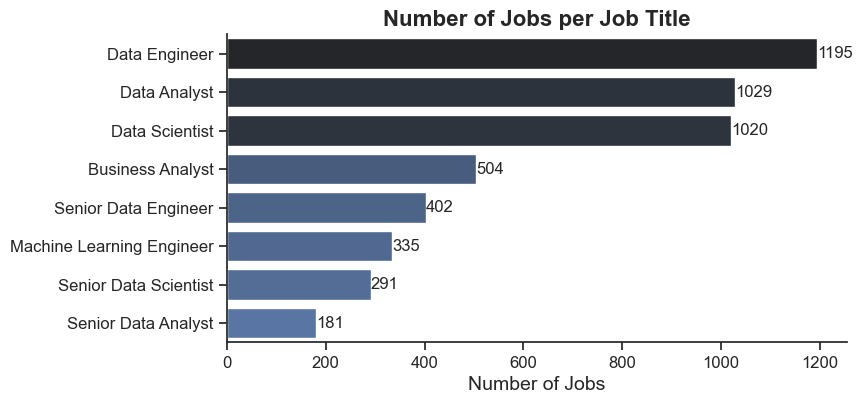

                           count
job_title_short                 
Data Engineer               1195
Data Analyst                1029
Data Scientist              1020
Business Analyst             504
Senior Data Engineer         402
Machine Learning Engineer    335
Senior Data Scientist        291
Senior Data Analyst          181


In [27]:
# Create a DataFrame with value counts for job titles
df_plot = df['job_title_short'].value_counts().to_frame()
df_plot.columns = ['count']

# Set the theme for consistency
sns.set_theme(style='ticks')

# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(figsize=(8, 4))

# Create a bar plot with Seaborn, specifying the axes
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', ax=ax, legend=False)

# Customize the plot
ax.set_title('Number of Jobs per Job Title', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Jobs', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove spines for a cleaner look
sns.despine(ax=ax)

# Annotate each bar with the count value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# Show the plot
plt.show()

# Optionally, save the plot to a file
fig.savefig('jobs_per_job_title_oop.png', dpi=300, bbox_inches='tight')

# Display a summary of the data for added insight
print(df_plot)

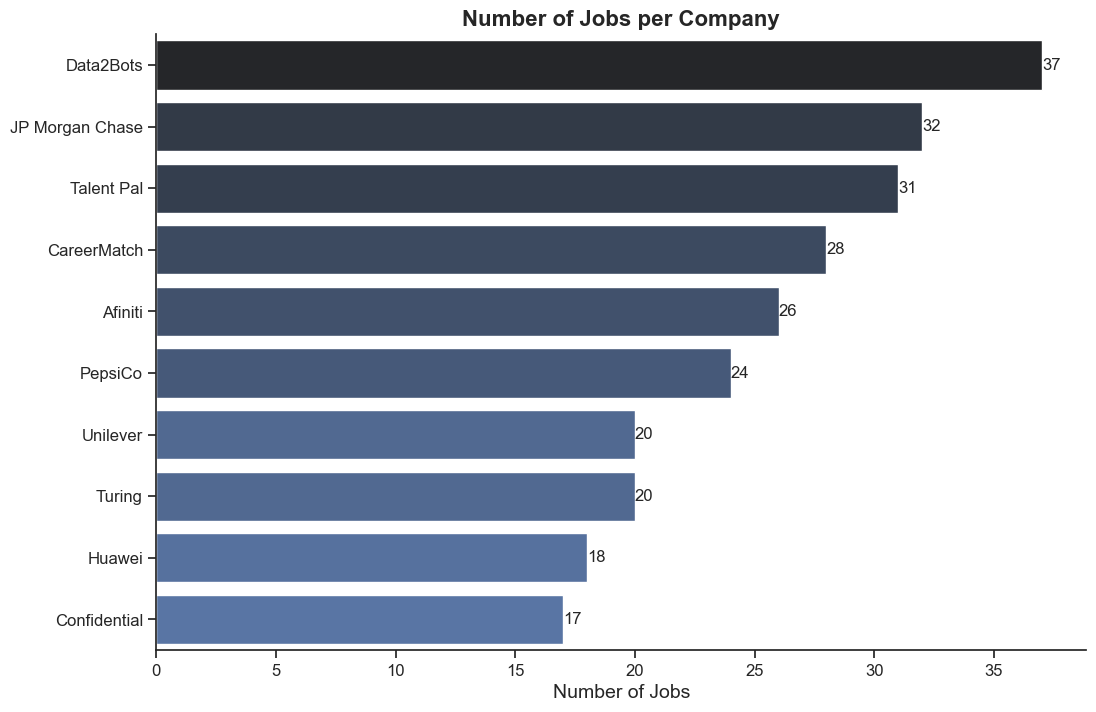

                 count
company_name          
Data2Bots           37
JP Morgan Chase     32
Talent Pal          31
CareerMatch         28
Afiniti             26
PepsiCo             24
Unilever            20
Turing              20
Huawei              18
Confidential        17


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with value counts for company names and select top 20
df_plot = df['company_name'].value_counts().to_frame()[1:].head(10)
df_plot.columns = ['count']

# Set the theme for consistency
sns.set_theme(style='ticks')

# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(figsize=(12, 8))

# Create a horizontal bar plot with Seaborn, specifying the axes
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', ax=ax, legend=False)

# Customize the plot
ax.set_title('Number of Jobs per Company', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Jobs', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove spines for a cleaner look
sns.despine(ax=ax)

# Annotate each bar with the count value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# Show the plot
plt.show()

# Optionally, save the plot to a file
fig.savefig('jobs_per_company_oop.png', dpi=300, bbox_inches='tight')

# Display a summary of the data for added insight
print(df_plot)


In [35]:
from collections import Counter

# Define columns and titles for bar charts
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# List of countries
countries = ['Pakistan', 'Turkey', 'Bangladesh', 'Nigeria', 'Egypt']

# Create an empty list to collect data for plotting
data_list = []

for country in countries:
    country_df = df[df['job_country'] == country]  # Filter DataFrame for each country
    
    for column, title in dict_column.items():
        # Use Counter to count occurrences of each value in the column
        counter = Counter(country_df[column])
        # Create a DataFrame for this country's data
        temp_df = pd.DataFrame({
            'Country': country,
            'Benefit Type': title,
            'Value': counter.keys(),
            'Count': counter.values()
        })
        # Append to the list
        data_list.append(temp_df)

# Concatenate all DataFrames into one
plot_data = pd.concat(data_list, ignore_index=True)
plot_data

,Country,Benefit Type,Value,Count
0,Pakistan,Work from Home Offered,False,1180
1,Pakistan,Work from Home Offered,True,191
2,Pakistan,Degree Requirement,False,1099
3,Pakistan,Degree Requirement,True,272
4,Pakistan,Health Insurance Offered,False,1368
5,Pakistan,Health Insurance Offered,True,3
6,Turkey,Work from Home Offered,True,233
7,Turkey,Work from Home Offered,False,670
8,Turkey,Degree Requirement,False,732
9,Turkey,Degree Requirement,True,171


In [38]:
import pandas as pd

# Define columns and titles for analysis
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Convert the DataFrame to long format for easier plotting
df_long = df.melt(id_vars=['job_country'], value_vars=dict_column.keys(),
                  var_name='Benefit Type', value_name='Value')

# Map benefit column names to descriptive titles
df_long['Benefit Type'] = df_long['Benefit Type'].map(dict_column)
df_long


,job_country,Benefit Type,Value
0,Turkey,Work from Home Offered,True
1,Nigeria,Work from Home Offered,False
2,Pakistan,Work from Home Offered,False
3,Pakistan,Work from Home Offered,False
4,Turkey,Work from Home Offered,False
...,...,...,...
14866,Pakistan,Health Insurance Offered,False
14867,Turkey,Health Insurance Offered,False
14868,Turkey,Health Insurance Offered,False
14869,Turkey,Health Insurance Offered,False


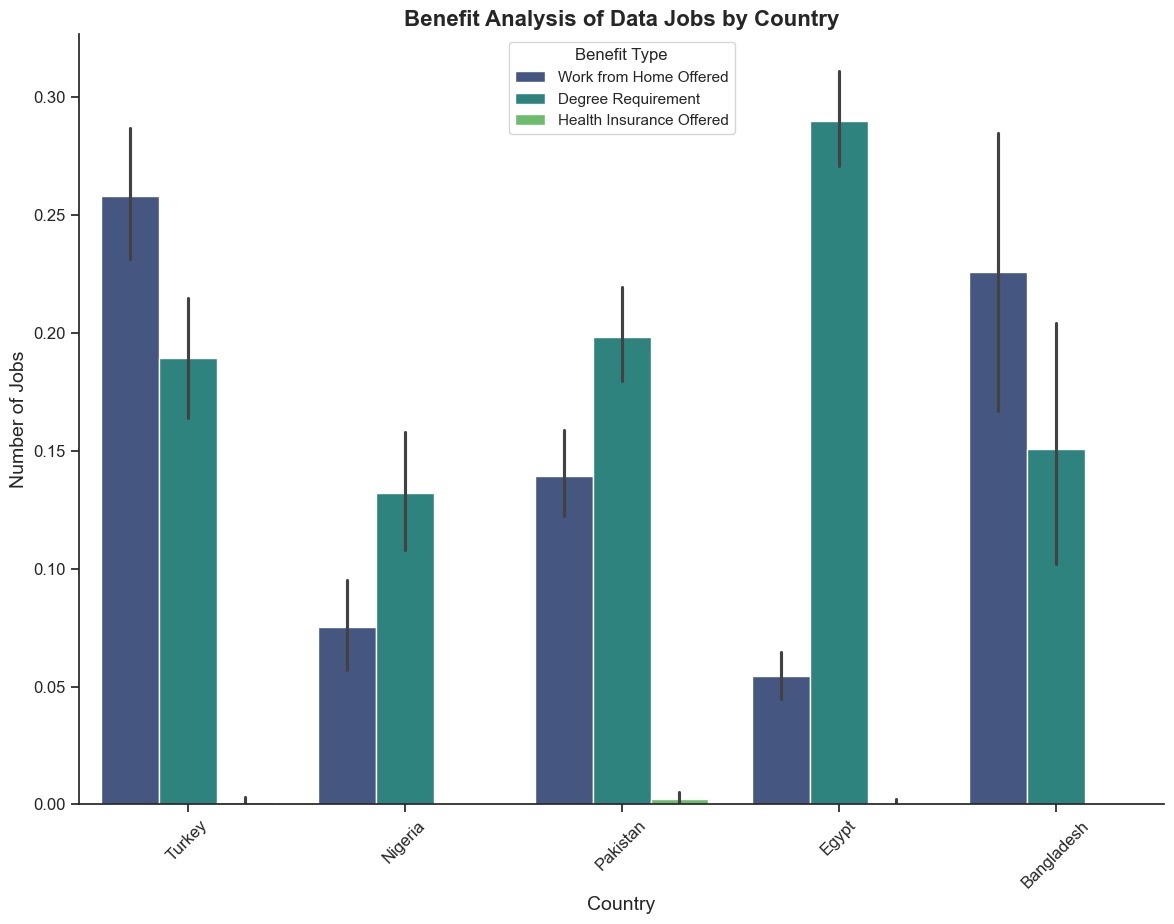

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plot
sns.set_theme(style='ticks')

# Create a figure and axes for plotting
fig, ax = plt.subplots(figsize=(14, 10))

# Create a bar plot with hue
sns.barplot(data=df_long, x='job_country', y='Value', hue='Benefit Type', palette='viridis', ax=ax)

# Customize the plot
ax.set_title('Benefit Analysis of Data Jobs by Country', fontsize=16, fontweight='bold')
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Number of Jobs', fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.despine(ax=ax)

# Show the plot
plt.show()


In [39]:
import pandas as pd

# Define columns and titles for analysis
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Convert the DataFrame to long format for easier plotting
df_long = df.melt(id_vars=['job_country'], value_vars=dict_column.keys(),
                  var_name='Benefit Type', value_name='Value')

# Count occurrences of each benefit type within each country
df_counts = df_long.groupby(['job_country', 'Benefit Type', 'Value']).size().reset_index(name='Count')

# Map benefit column names to descriptive titles
df_counts['Benefit Type'] = df_counts['Benefit Type'].map(dict_column)


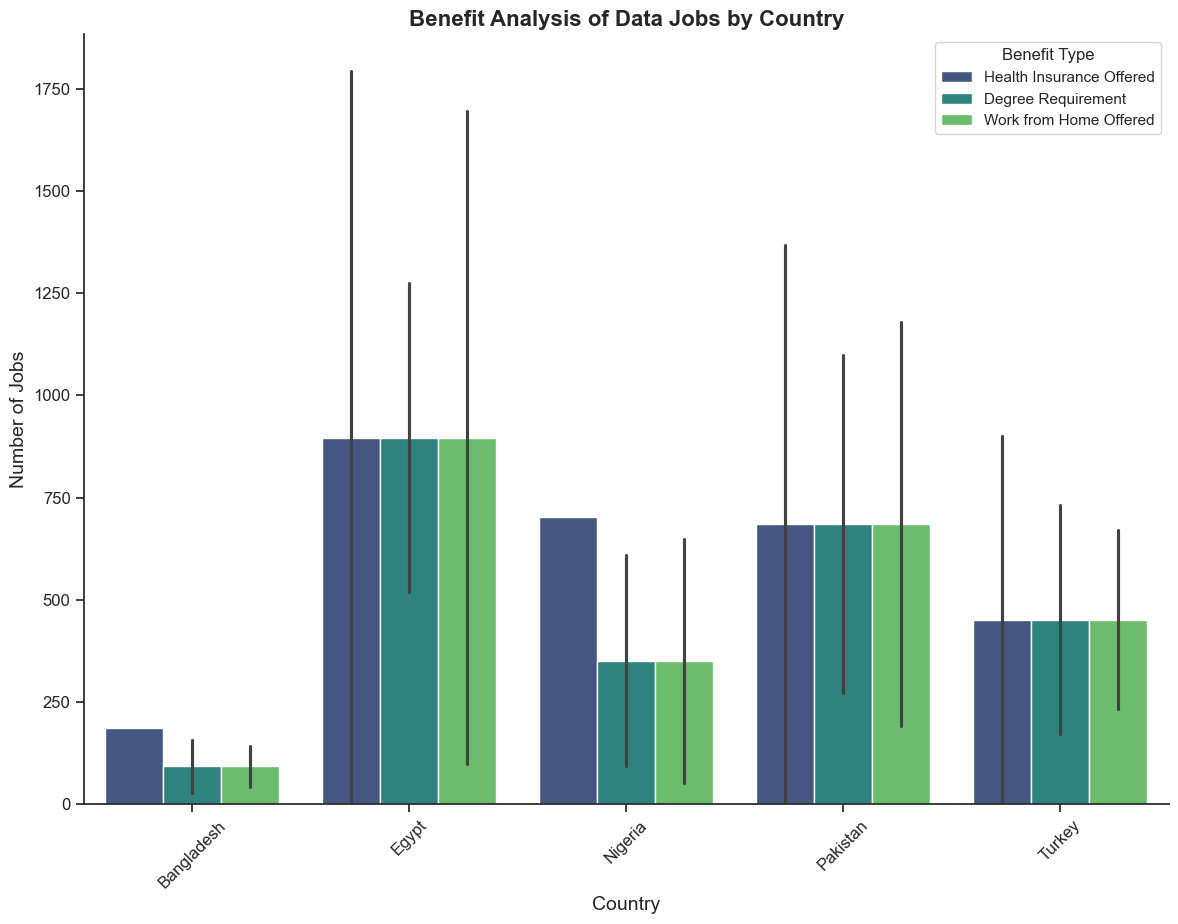

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plot
sns.set_theme(style='ticks')

# Create a figure and axes for plotting
fig, ax = plt.subplots(figsize=(14, 10))

# Create a bar plot with hue
sns.barplot(data=df_counts, x='job_country', y='Count', hue='Benefit Type', palette='viridis', ax=ax)

# Customize the plot
ax.set_title('Benefit Analysis of Data Jobs by Country', fontsize=16, fontweight='bold')
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Number of Jobs', fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.despine(ax=ax)

# Show the plot
plt.show()
